train_X [-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.6363

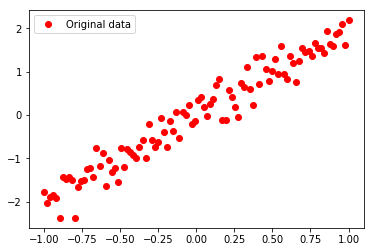

Epoch: 1 loss= 0.08905489 W= [2.1555989] b= [-0.05218915]
Epoch: 3 loss= 0.07708353 W= [2.0232966] b= [-0.01664024]
Epoch: 5 loss= 0.076272056 W= [1.9874314] b= [-0.00313348]
Epoch: 7 loss= 0.07626388 W= [1.9781299] b= [0.0004317]
Epoch: 9 loss= 0.07627549 W= [1.9757239] b= [0.00135484]
Epoch: 11 loss= 0.07627941 W= [1.9751023] b= [0.00159338]
Epoch: 13 loss= 0.07628048 W= [1.9749411] b= [0.00165521]
Epoch: 15 loss= 0.076280765 W= [1.9748995] b= [0.00167119]
Epoch: 17 loss= 0.07628084 W= [1.9748887] b= [0.00167538]
Epoch: 19 loss= 0.07628086 W= [1.9748856] b= [0.00167654]
Finished!
cost= 0.07628086 W= [1.9748847] b= [0.00167683]


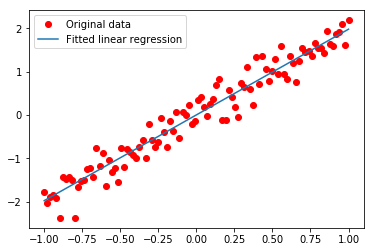

a = [0.08905489, 0.07708353, 0.076272056, 0.07626388, 0.07627549, 0.07627941, 0.07628048, 0.076280765, 0.07628084, 0.07628086] w= 10
idx: 0 val: 0.08905489 sum(a[(idx-w):idx])/w  0.0
idx: 1 val: 0.07708353 sum(a[(idx-w):idx])/w  0.0
idx: 2 val: 0.076272056 sum(a[(idx-w):idx])/w  0.0
idx: 3 val: 0.07626388 sum(a[(idx-w):idx])/w  0.0
idx: 4 val: 0.07627549 sum(a[(idx-w):idx])/w  0.0
idx: 5 val: 0.07627941 sum(a[(idx-w):idx])/w  0.0
idx: 6 val: 0.07628048 sum(a[(idx-w):idx])/w  0.0
idx: 7 val: 0.076280765 sum(a[(idx-w):idx])/w  0.0
idx: 8 val: 0.07628084 sum(a[(idx-w):idx])/w  0.0
idx: 9 val: 0.07628086 sum(a[(idx-w):idx])/w  0.0


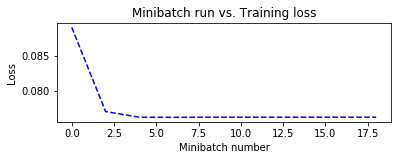

INFO:tensorflow:Restoring parameters from log/linearmodel.cpkt
x=0.2, z= [0.39665377]


In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 14 10:13:01 2019

@author: xiaofang
"""

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

plotdata = {"batchsize":[], "loss":[]}

''' 1 生成模拟数据 '''
train_X = np.linspace(-1, 1, 100) # 生成100个-1到1之前的数据点
print("train_X", train_X)
train_Y = 2 * train_X + np.random.randn(100) * 0.3 # y=2*x,加入了一个random随机数作为噪声

# 显示模拟数据点
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

# 初始化图
tf.reset_default_graph()

''' 2 搭建模型 '''
X = tf.placeholder("float")
Y = tf.placeholder("float")

# 参数
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")

# 前向结构
z = tf.multiply(X, W) + b

# 反向传播更新
# reduce_mean函数的作用是求平均值square是求平方这里的square(Y-z)就是求Y-z的误差平方值
cost = tf.reduce_mean(tf.square(Y-z))
learning_rate = 0.01

# 使用TF的梯度下降优化器设定的学习率不断优化W和b使用代价函数cost最小,从而达到z与Y的误差最小化
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

''' 3 迭代训练模型 '''
init = tf.global_variables_initializer()

training_epochs = 20 # 20轮
display_step = 2
saver = tf.train.Saver()
savedir = "log/"

with tf.Session() as sess:
    sess.run(init)
    
    # 训练模型
    for epoch in range(training_epochs):
        for(x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y}) # 使用x,y替换占位符X,Y
        
        # 显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Epoch:", epoch + 1, "loss=", loss, "W=", sess.run(W), "b=", sess.run(b))
            if not (loss == 'NA'):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)

    print("Finished!")
    saver.save(sess, savedir + "linearmodel.cpkt") # 保存模型到linearmodel.cpkt
    print("cost=", sess.run(cost, feed_dict={X: train_X, Y:train_Y}),"W=", sess.run(W), "b=", sess.run(b))
    
    # 图形显示
    plt.plot(train_X, train_Y, 'ro', label="Original data")
    plt.plot(train_X, sess.run(W)*train_X + sess.run(b), label='Fitted linear regression')
    plt.legend()
    plt.show()
    
    def moving_average(a, w=10):
        print("a =", a, "w=", w)
        if len(a) < w:
            return a[:]
        for idx,val in enumerate(a):
            print("idx:",idx,"val:",val, "sum(a[(idx-w):idx])/w ", (sum(a[(idx-w):idx])/w))
        return [val if idx <w else sum(a[(idx-w):idx])/w for idx,val in enumerate(a)]
    
    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
    plt.xlabel("Minibatch number")
    plt.ylabel("Loss")
    plt.title("Minibatch run vs. Training loss")
    plt.show()

# 使用模型,重启一个session
with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    saver.restore(sess2, savedir + "linearmodel.cpkt")# 从linearmodel.cpkt恢复模型
    print("x=0.2, z=", sess2.run(z, feed_dict={X:0.2}))
